In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

In [2]:
class KNearestNeighbor(object):
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, y):
        # Store the original points
        
        self.X = X
        self.y = y
        
        return self
        
    def predict(self, X, y=None):
        
        # Initialize a zero distance matrix
        dists = np.zeros((X.shape[0], self.X.shape[0]))

        # Loop through all possible pairs and compute their distances
        for i in range(dists.shape[0]):
            for j in range(dists.shape[1]):
                dists[i, j] = self.distance(X[i], self.X[j])
                
        
        # Sort the distance array row-wise, and select the top k indexes for each row
        indexes = np.argsort(dists, axis=1)[:,:self.k]
        
        # Compute the mean of the values
        mean = np.mean(self.y[indexes], axis=1)
        
        return mean
                
    def distance(self, x, y):
        return np.sqrt(np.dot(x - y, x - y))

In [3]:
x = np.linspace(0, 5, 20)

In [4]:
m = 1.5
c = 1
y = m * x + c + np.random.normal(size=(20,))

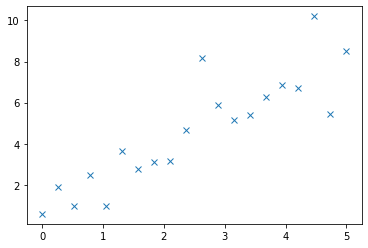

In [5]:
plt.plot(x, y, 'x')

In [6]:
model = KNearestNeighbor(k=3)

In [7]:
model.fit(x,y)

In [8]:
predicted = model.predict(x.reshape(-1, 1))

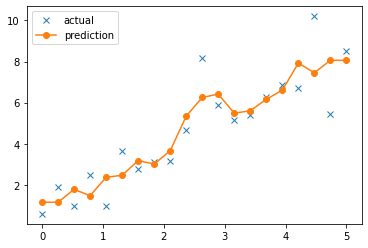

In [11]:
plt.plot(
    x, y, "x",
    x, model.predict(x), "-o"    
)
plt.legend(["actual", "prediction"])